# Proximity Experiments

## Imports

In [43]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [44]:
paths = glob.glob('data/proximity/dataset_*.csv')
paths

['data/proximity\\dataset_238a_-12dBm.csv',
 'data/proximity\\dataset_ips_4dBm.csv',
 'data/proximity\\dataset_train_university_-12dBm.csv']

In [45]:
dataset = pd.DataFrame()
for path in paths:
    data = pd.read_csv(path)
    data['filename'] = os.path.split(path)[1]
    dataset = dataset.append(data)    

dataset
#dataset[dataset['filename'] == 'dataset_238a.csv']

,coordinate_X,coordinate_Y,rssi_Value,rolling_mean_rssi,zone,filename
0,0.0,0.0,-25,-25.000000,Personal,dataset_238a_-12dBm.csv
1,0.0,0.0,-27,-26.000000,Personal,dataset_238a_-12dBm.csv
2,0.0,0.0,-28,-26.666667,Personal,dataset_238a_-12dBm.csv
3,0.0,0.0,-28,-27.000000,Personal,dataset_238a_-12dBm.csv
4,0.0,0.0,-28,-27.200000,Personal,dataset_238a_-12dBm.csv
...,...,...,...,...,...,...
24829,0.0,4.5,-92,-90.480000,Public,dataset_train_university_-12dBm.csv
24830,0.0,4.5,-93,-90.576923,Public,dataset_train_university_-12dBm.csv
24831,0.0,4.5,-90,-90.555556,Public,dataset_train_university_-12dBm.csv
24832,0.0,4.5,-90,-90.535714,Public,dataset_train_university_-12dBm.csv


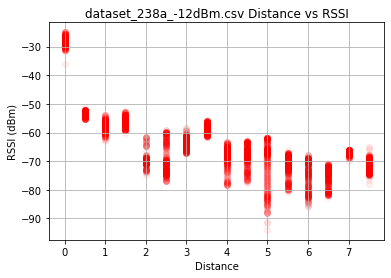

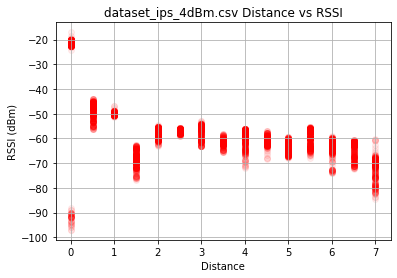

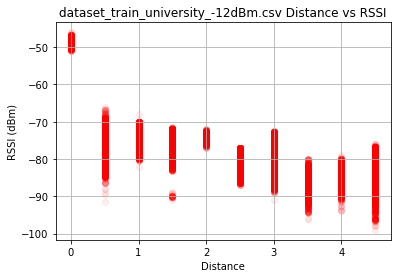

In [46]:
for path in paths:
    filename = os.path.split(path)[1]
    data = dataset[dataset['filename'] == filename]
    fig, ax = plt.subplots()
    #ax.scatter(data['coordinate_Y'], data['rssi_Value'], c='#00ff0010')
    ax.scatter(data['coordinate_Y'], data['rolling_mean_rssi'], c="#ff000010" )

    ax.set(xlabel='Distance', ylabel='RSSI (dBm)',
           title=filename+' Distance vs RSSI')
    ax.grid()
    plt.show()

In [47]:
curr_dataset = dataset[dataset['filename'] == 'dataset_238a_-12dBm.csv']

In [48]:
X = np.linspace(curr_dataset['rolling_mean_rssi'].min(), curr_dataset['rolling_mean_rssi'].max(), 1000)
X_ = np.linspace(curr_dataset['coordinate_Y'].min(), curr_dataset['coordinate_Y'].max(), 1000)

In [49]:
fit_params = np.polyfit(curr_dataset['rolling_mean_rssi'], curr_dataset['coordinate_Y'], 1)
fit_params

array([-0.13886407, -5.13059356])

In [50]:
fit_func = np.poly1d(fit_params)
fit_func

poly1d([-0.13886407, -5.13059356])

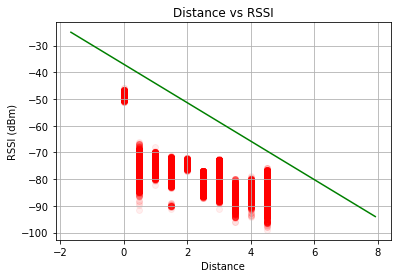

In [67]:
fig, ax = plt.subplots()
#ax.scatter(data['coordinate_Y'], data['rssi_Value'], c='#00ff0010')
ax.scatter(data['coordinate_Y'], data['rolling_mean_rssi'], c="#ff000010" )
ax.set(xlabel='Distance', ylabel='RSSI (dBm)', title='Distance vs RSSI')
ax.plot(fit_func(X), X, color='green')
ax.grid()
plt.show()

## Just experimenting with SciPy's cuve_fit

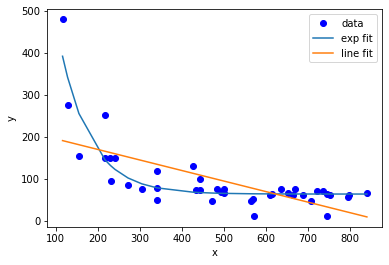

In [83]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

my_data = np.genfromtxt('data/yourdata.csv', delimiter=',')
my_data = my_data[my_data[:,0].argsort()]
xdata = my_data[:,0].transpose()
ydata = my_data[:,1].transpose()

# define a function for fitting
def func(x, a, b, c, d):
    return a * np.exp(-b * (x - c)) + d

# fit your data and getting fit parameters
popt, pcov = curve_fit(func, xdata, ydata, p0=[50, 0, 90, 63], bounds=([0, 0, 90, 0], [1000, 0.1, 200, 200]))

def func_line(x, a, b):
    return a*x + b

popt_line, pcov_line = curve_fit(func_line, xdata, ydata, p0=[1,0])

plt.plot(xdata, ydata, 'bo', label='data')
plt.plot(xdata, func(xdata, *popt), '-', label='exp fit')
plt.plot(xdata, func_line(xdata, *popt_line), '-', label='line fit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()